<a href="https://colab.research.google.com/github/AbdAllAh950/Machine-Learning/blob/main/Task_03_%D0%98%D1%81%D1%81%D0%B0_%D0%90%D0%B1%D0%B4%D0%B0%D0%BB%D0%BB%D0%B0_%D0%A1%D0%B0%D0%B9%D0%B5%D0%B4_%D0%90%D0%BB%D0%B8_Group_J4133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Data and Import Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset from bioresponse.csv
data = pd.read_csv('/content/bioresponse.csv')

# Separate features (X) and target variable (y)
X = data.iloc[:, 1:].values  # Molecular descriptors
y = data.iloc[:, 0].values   # Biological response

# Split data: 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Implement Logistic Regression Functions with Optimizers**

In [2]:
# Define sigmoid function for logistic regression
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_weights(dim):
    return np.zeros((dim, 1)), 0

# Propagate function to calculate gradients and cost
def propagate(w, b, X, y):
    m = X.shape[1]  # number of examples
    A = sigmoid(np.dot(w.T, X) + b)  # calculate activation
    cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost

    # Gradients for weight and bias
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)

    return dw, db, cost

# Modify optimize function to use different optimization methods
def optimize(X, y, method='GD', learning_rate=0.01, iterations=1000):
    costs = []
    w, b = initialize_weights(X.shape[0])  # Initialize parameters

    # Initialize parameters for Adam optimizer
    v_dw, v_db = 0, 0
    s_dw, s_db = 0, 0
    beta1, beta2 = 0.9, 0.999
    epsilon = 1e-8

    # Optimization loop
    for i in range(iterations):
        dw, db, cost = propagate(w, b, X, y)

        # Apply Stochastic Gradient Descent (SGD)
        if method == 'SGD':
            index = np.random.randint(X.shape[1])  # Randomly select an example
            dw, db, cost = propagate(w, b, X[:, index:index+1], y[index:index+1])

        # Apply Adam optimization
        elif method == 'Adam':
            # Calculate moving averages for gradients and squared gradients
            v_dw = beta1 * v_dw + (1 - beta1) * dw
            v_db = beta1 * v_db + (1 - beta1) * db
            s_dw = beta2 * s_dw + (1 - beta2) * (dw ** 2)
            s_db = beta2 * s_db + (1 - beta2) * (db ** 2)
            # Bias-corrected estimates
            v_dw_corr = v_dw / (1 - beta1 ** (i + 1))
            v_db_corr = v_db / (1 - beta1 ** (i + 1))
            s_dw_corr = s_dw / (1 - beta2 ** (i + 1))
            s_db_corr = s_db / (1 - beta2 ** (i + 1))
            # Update weights and bias
            w -= learning_rate * v_dw_corr / (np.sqrt(s_dw_corr) + epsilon)
            b -= learning_rate * v_db_corr / (np.sqrt(s_db_corr) + epsilon)
        # Apply simple Gradient Descent
        else:
            w -= learning_rate * dw
            b -= learning_rate * db

        # Save the cost for every 100 iterations
        if i % 100 == 0:
            costs.append(cost)

    return w, b, costs

**Training and Testing the Model**

In [3]:
# Prediction function to classify based on learned weights and bias
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X) + b)
    return (A > 0.5).astype(int)

# Define learning rates and methods for optimization
learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5]
methods = ['GD', 'SGD', 'Adam']
results = {}

# Train and evaluate models with different optimization methods and learning rates
for method in methods:
    for lr in learning_rates:
        # Optimize and train model
        w, b, costs = optimize(X_train.T, y_train, method=method, learning_rate=lr, iterations=1000)
        # Make predictions on test data
        y_pred = predict(w, b, X_test.T)
        # Calculate accuracy of predictions
        accuracy = accuracy_score(y_test, y_pred.T)
        # Store results in dictionary
        results[(method, lr)] = (accuracy, costs)

# Displaying results: method, learning rate, and accuracy
for method_lr, (accuracy, costs) in results.items():
    method, lr = method_lr
    print(f'Method: {method}, Learning Rate: {lr}, Accuracy: {accuracy:.4f}')

<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost
<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost
<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost
<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost
<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cost
<ipython-input-2-eb8e0e7e7289>:13: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))  # compute cos

Method: GD, Learning Rate: 0.001, Accuracy: 0.6503
Method: GD, Learning Rate: 0.01, Accuracy: 0.7388
Method: GD, Learning Rate: 0.05, Accuracy: 0.7548
Method: GD, Learning Rate: 0.1, Accuracy: 0.7527
Method: GD, Learning Rate: 0.5, Accuracy: 0.7111
Method: SGD, Learning Rate: 0.001, Accuracy: 0.4520
Method: SGD, Learning Rate: 0.01, Accuracy: 0.4520
Method: SGD, Learning Rate: 0.05, Accuracy: 0.4520
Method: SGD, Learning Rate: 0.1, Accuracy: 0.4520
Method: SGD, Learning Rate: 0.5, Accuracy: 0.4520
Method: Adam, Learning Rate: 0.001, Accuracy: 0.7452
Method: Adam, Learning Rate: 0.01, Accuracy: 0.7335
Method: Adam, Learning Rate: 0.05, Accuracy: 0.7207
Method: Adam, Learning Rate: 0.1, Accuracy: 0.7196
Method: Adam, Learning Rate: 0.5, Accuracy: 0.7079


**Plotting Learning Curves**

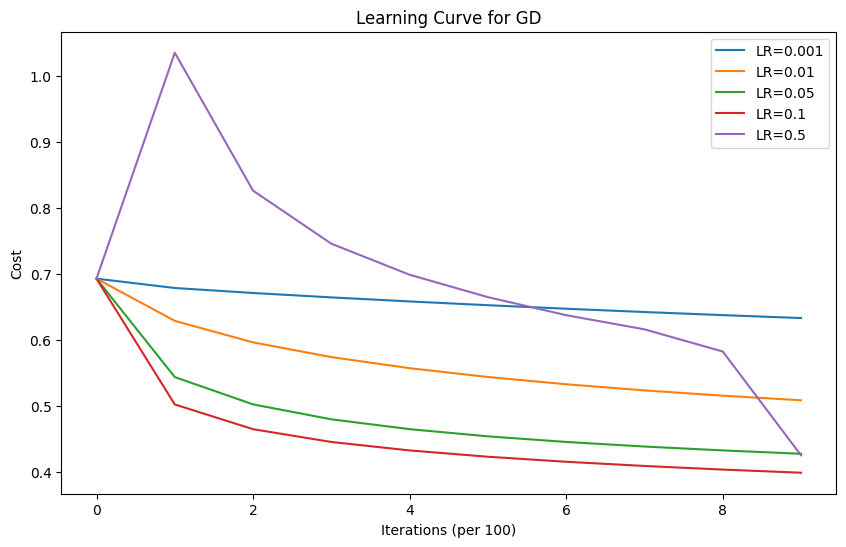

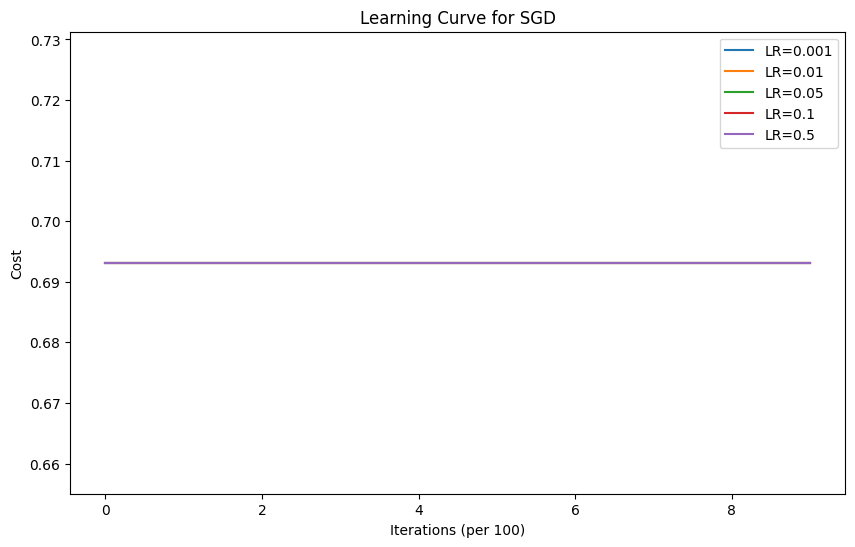

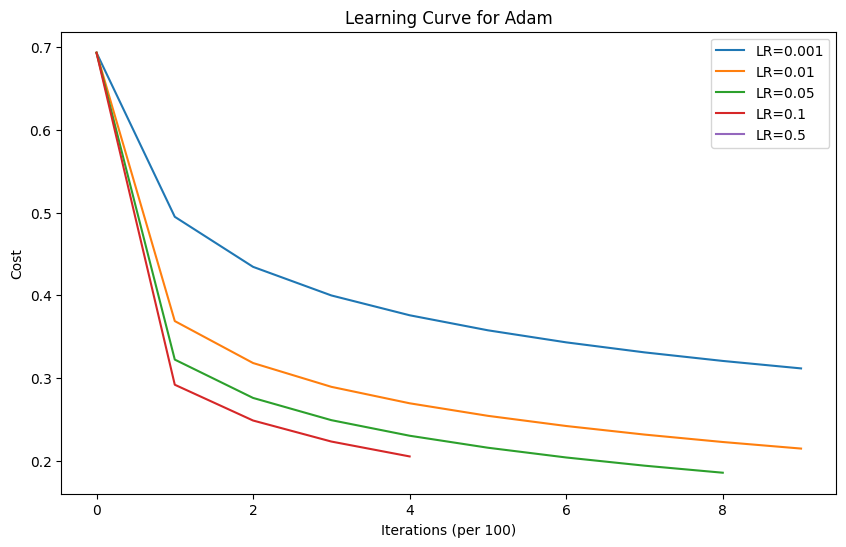

In [4]:
# Plot learning curves for each method and learning rate
for method in methods:
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        _, costs = results[(method, lr)]
        plt.plot(costs, label=f'LR={lr}')  # Plot cost for each learning rate
    plt.title(f'Learning Curve for {method}')  # Title for method
    plt.xlabel('Iterations (per 100)')
    plt.ylabel('Cost')
    plt.legend()
    plt.show()  # Show plot

**Compare Model Accuracy**\
compares and summarizes the accuracy of each model for different optimization methods and learning rates. We’ll output the best accuracy and corresponding method/learning rate.


In [5]:
# Find the best performing model (highest accuracy)
best_method, best_lr = max(results, key=lambda x: results[x][0])
best_accuracy, _ = results[(best_method, best_lr)]

print(f"\nBest Model:")
print(f"Optimization Method: {best_method}")
print(f"Learning Rate: {best_lr}")
print(f"Accuracy: {best_accuracy:.4f}")


Best Model:
Optimization Method: GD
Learning Rate: 0.05
Accuracy: 0.7548
